# Data Analysis:

normality

In [1]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [2]:
concus_data = pd.read_csv("Concussion Injuries 2012-2014.csv")
concus_data

,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Eric Weddle - Baltimore Ravens vs. San Diego C...,Eric Weddle,San Diego Chargers,Baltimore Ravens vs. San Diego Chargers (25/11...,25/11/2012,Baltimore Ravens,Safety,No,No,12,2012/2013,1,0.0,No,Concussion,85,90 downs,76.00 downs
388,Blidi Wreh-Wilson - Indianapolis Colts vs. Ten...,Blidi Wreh-Wilson,Tennessee Titans,Indianapolis Colts vs. Tennessee Titans (28/9/...,28/09/2014,Indianapolis Colts,Comerback,No,No,4,2014/2015,1,1.0,No,Concussion,85,90 downs,78.00 downs
389,Josh Sitton - Green Bay Packers vs. Tennessee ...,Josh Sitton,Green Bay Packers,Green Bay Packers vs. Tennessee Titans (23/12/...,23/12/2012,Tennessee Titans,Guard,No,Yes,16,2012/2013,1,0.0,No,Concussion,87,70 downs,73.64 downs
390,Nate Solder - New England Patriots vs. Clevela...,Nate Solder,New England Patriots,New England Patriots vs. Cleveland Browns (8/1...,8/12/2013,Cleveland Browns,Offensive Tackle,No,Yes,14,2013/2014,1,0.0,No,Concussion,87,52 downs,78.83 downs


In [3]:
rel_concus_data = concus_data.drop(columns = ['ID', 'Total Snaps'])
display(rel_concus_data.head())

,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,14 downs,37.00 downs
1,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,78 downs,73.50 downs
2,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,25 downs,17.50 downs
3,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,82 downs,41.50 downs
4,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,Did not return from injury,NaN


In [4]:
from datetime import datetime
rel_concus_data['Date'] = pd.to_datetime(rel_concus_data['Date'], format = '%d/%m/%Y')

In [5]:
rel_concus_data['Pre-Season Injury?'] = rel_concus_data['Pre-Season Injury?'].replace(('Yes', 'No'), (1, 0))

In [6]:
rel_concus_data['Winning Team?'] = rel_concus_data['Winning Team?'].replace(('Yes', 'No'), (1, 0))

In [7]:
rel_concus_data['Season'] = rel_concus_data['Season'].replace(('2012/2013', '2013/2014', '2014/2015'), (2012, 2013, 2014))

In [8]:
rel_concus_data['Unknown Injury?'] = rel_concus_data['Unknown Injury?'].replace(('Yes', 'No'), (1, 0))

In [9]:
rel_concus_data['Reported Injury Type'] = rel_concus_data['Reported Injury Type'].fillna('NR')


In [10]:
for i in range(len(rel_concus_data['Play Time After Injury'])):
    x = rel_concus_data['Play Time After Injury'][i]
    if type(x) == str:
        a = x.split(' ')[0]
        try:
            rel_concus_data['Play Time After Injury'][i] = int(a)
        except:
            rel_concus_data['Play Time After Injury'][i] = 0
    else:
        rel_concus_data['Play Time After Injury'][i] = x

/var/folders/2h/nmfrxbhx4ts84jv_xc8vhsvr0000gn/T/ipykernel_13124/4095007743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_concus_data['Play Time After Injury'][i] = int(a)
/var/folders/2h/nmfrxbhx4ts84jv_xc8vhsvr0000gn/T/ipykernel_13124/4095007743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_concus_data['Play Time After Injury'][i] = 0
/var/folders/2h/nmfrxbhx4ts84jv_xc8vhsvr0000gn/T/ipykernel_13124/4095007743.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [11]:
for i in range(len(rel_concus_data['Average Playtime Before Injury'])):
    x = rel_concus_data['Average Playtime Before Injury'][i]
    if type(x) == str:
        a = x.split(' ')[0]
        rel_concus_data['Average Playtime Before Injury'][i] = float(a)
    else:
        rel_concus_data['Average Playtime Before Injury'][i] = x
print(type(rel_concus_data['Average Playtime Before Injury'][0]))

<class 'float'>


/var/folders/2h/nmfrxbhx4ts84jv_xc8vhsvr0000gn/T/ipykernel_13124/3507533288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_concus_data['Average Playtime Before Injury'][i] = float(a)
/var/folders/2h/nmfrxbhx4ts84jv_xc8vhsvr0000gn/T/ipykernel_13124/3507533288.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_concus_data['Average Playtime Before Injury'][i] = x


In [12]:
display(rel_concus_data.describe())
display(rel_concus_data['Average Playtime Before Injury'].dropna().describe())
display(rel_concus_data['Play Time After Injury'].describe())

,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?
count,392.000000,392.000000,392.000000,392.000000,392.000000,361.000000,392.000000
mean,0.066327,0.464286,8.548469,2012.739796,0.920918,0.925208,0.012755
std,0.249170,0.499360,5.004111,0.738872,0.270211,1.742429,0.112359
min,0.000000,0.000000,1.000000,2012.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,2012.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,9.000000,2013.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,13.000000,2013.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,19.000000,2014.000000,1.000000,14.000000,1.000000


count     341.0
unique    278.0
top        71.0
freq        5.0
Name: Average Playtime Before Injury, dtype: float64

count     349
unique     91
top         0
freq       34
Name: Play Time After Injury, dtype: int64

In [13]:
test = rel_concus_data.dropna()
test.describe()

,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?
count,328.0,328.000000,328.000000,328.000000,328.0,328.000000,328.0
mean,0.0,0.457317,9.542683,2012.679878,1.0,0.917683,0.0
std,0.0,0.498936,4.615293,0.698157,0.0,1.754660,0.0
min,0.0,0.000000,1.000000,2012.000000,1.0,0.000000,0.0
25%,0.0,0.000000,5.000000,2012.000000,1.0,0.000000,0.0
50%,0.0,0.000000,10.000000,2013.000000,1.0,0.000000,0.0
75%,0.0,1.000000,13.000000,2013.000000,1.0,1.000000,0.0
max,0.0,1.000000,19.000000,2014.000000,1.0,14.000000,0.0


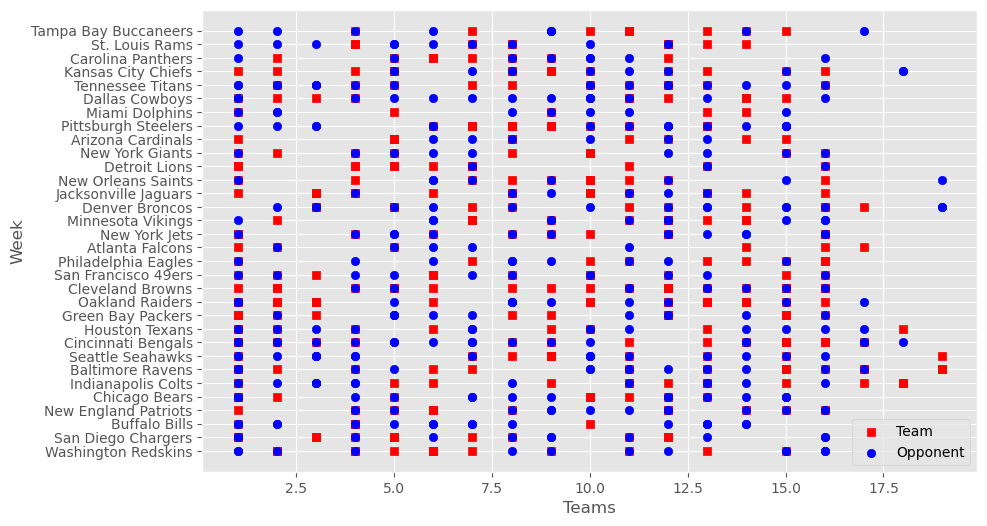

In [14]:
plt.scatter(x=rel_concus_data['Week of Injury'],y=rel_concus_data['Team'],c='r',marker='s',label='Team')
plt.scatter(x=rel_concus_data['Week of Injury'],y=rel_concus_data['Opposing Team'],c='b',marker='o',label='Opponent')

plt.legend(loc=4)
plt.xlabel('Teams')
plt.ylabel('Week')
plt.show()

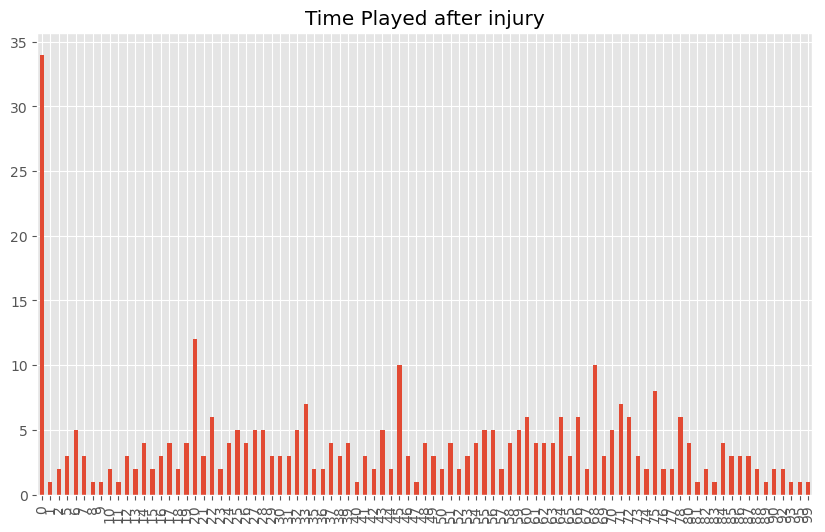

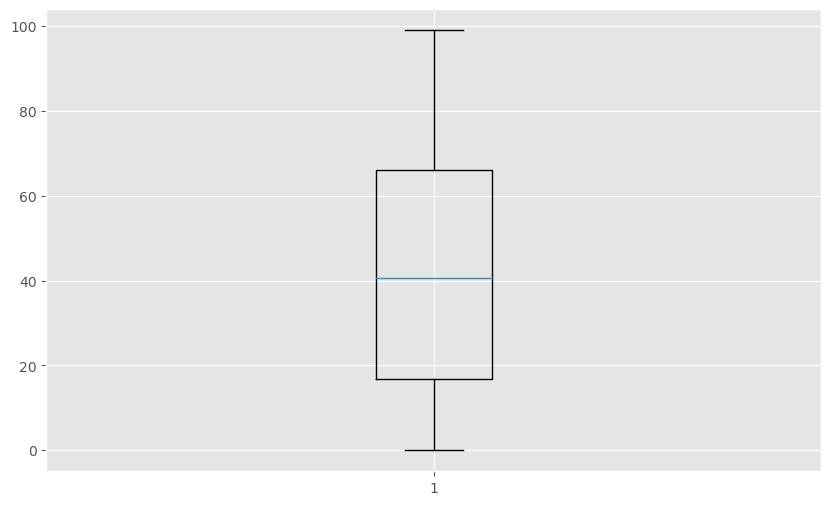

In [15]:
post_inj = rel_concus_data["Play Time After Injury"].value_counts()
post_inj.sort_index().plot(kind = 'bar', title = 'Time Played after injury')
plt.show()
plt.boxplot(rel_concus_data["Play Time After Injury"])
plt.show()

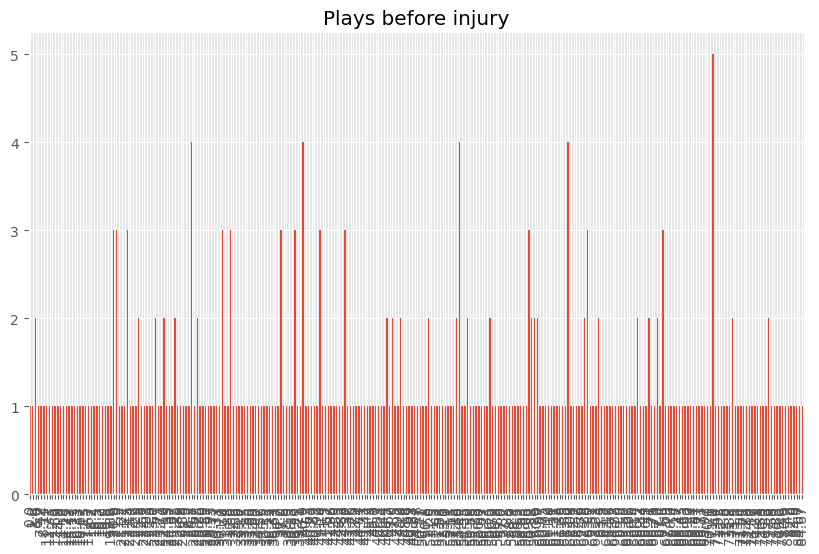

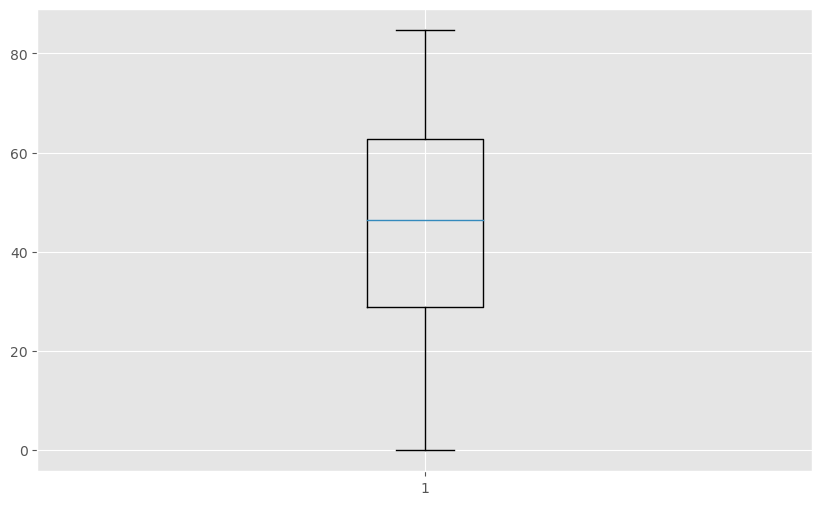

In [16]:
Pre_inj = rel_concus_data["Average Playtime Before Injury"].value_counts()
Pre_inj.sort_index().plot(kind = 'bar', title = 'Plays before injury')
plt.show()
plt.boxplot(rel_concus_data["Average Playtime Before Injury"])
plt.show()

In [17]:
rel_concus_data['Average Playtime Before Injury'] = rel_concus_data['Average Playtime Before Injury'].fillna(rel_concus_data['Average Playtime Before Injury'].mean())

In [18]:
rel_concus_data['Play Time After Injury'] = rel_concus_data['Play Time After Injury'].fillna(rel_concus_data['Play Time After Injury'].mean())

In [19]:
display(rel_concus_data.describe())

,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Play Time After Injury,Average Playtime Before Injury
count,392.000000,392.000000,392.000000,392.000000,392.000000,361.000000,392.000000,392.000000,392.000000
mean,0.066327,0.464286,8.548469,2012.739796,0.920918,0.925208,0.012755,43.249284,47.426364
std,0.249170,0.499360,5.004111,0.738872,0.270211,1.742429,0.112359,25.483123,18.330182
min,0.000000,0.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,2012.000000,1.000000,0.000000,0.000000,22.750000,33.857500
50%,0.000000,0.000000,9.000000,2013.000000,1.000000,0.000000,0.000000,43.249284,47.426364
75%,0.000000,1.000000,13.000000,2013.000000,1.000000,1.000000,0.000000,64.000000,62.185000
max,1.000000,1.000000,19.000000,2014.000000,1.000000,14.000000,1.000000,99.000000,84.670000


                                Pre-Season Injury?  Winning Team?  \
Pre-Season Injury?                    1.000000e+00       0.039641   
Winning Team?                         3.964142e-02       1.000000   
Week of Injury                       -4.025620e-01       0.027817   
Season                                1.495494e-01       0.044066   
Weeks Injured                        -9.095339e-01      -0.068371   
Games Missed                                   NaN      -0.117452   
Unknown Injury?                      -3.029533e-02       0.076514   
Play Time After Injury               -4.833321e-02       0.027357   
Average Playtime Before Injury       -5.296762e-17      -0.052129   

                                Week of Injury    Season  Weeks Injured  \
Pre-Season Injury?                   -0.402562  0.149549  -9.095339e-01   
Winning Team?                         0.027817  0.044066  -6.837064e-02   
Week of Injury                        1.000000 -0.263582   3.726191e-01   
Season   

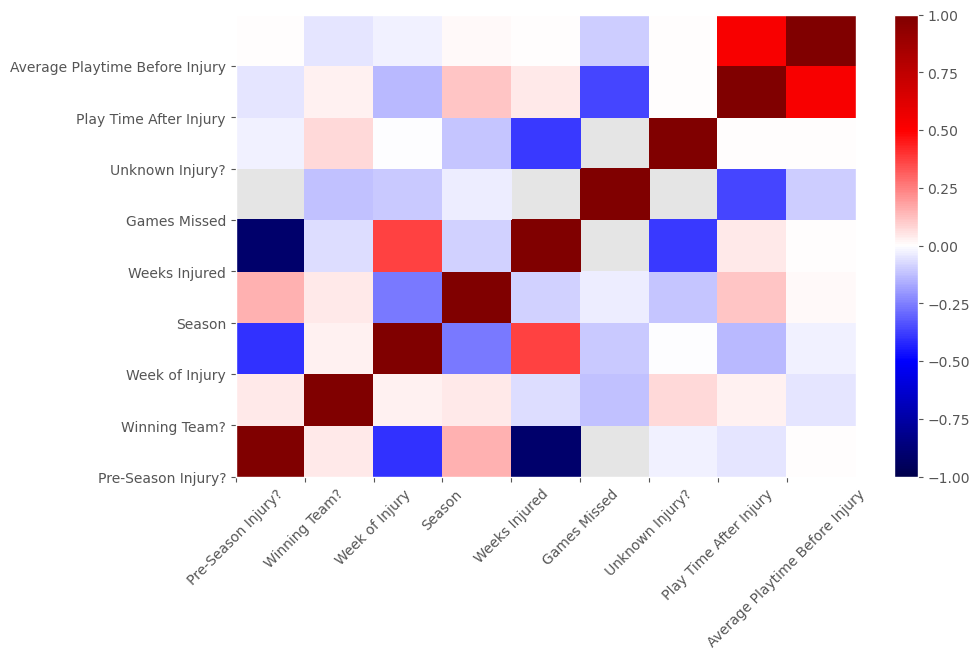

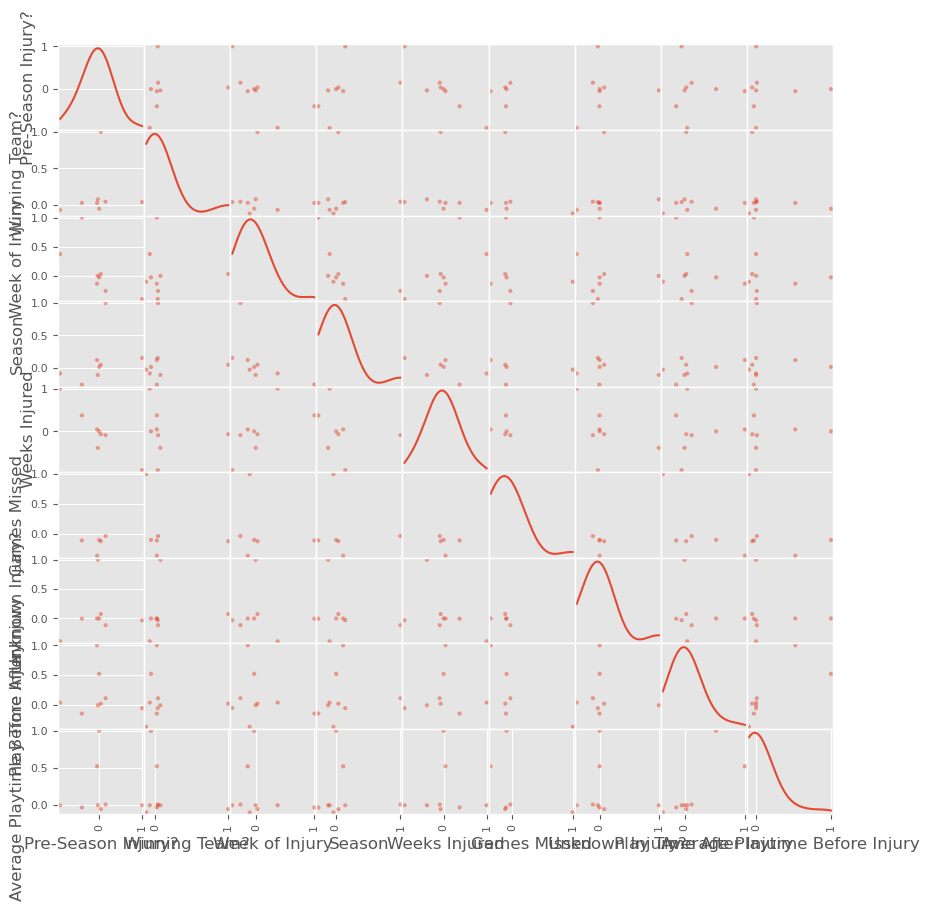

In [20]:
correlation_matrix = rel_concus_data.corr()
print(correlation_matrix)

heatmap = plt.pcolor(correlation_matrix, cmap ='seismic', vmin = -1, vmax = 1)
plt.colorbar(heatmap)
plt.xticks(np.arange(len(correlation_matrix)), labels = correlation_matrix, rotation = 45)
plt.yticks(np.arange(len(correlation_matrix)), labels = correlation_matrix)
plt.show()


from pandas.plotting import scatter_matrix

scatter_matrix(correlation_matrix, figsize = (10, 10), diagonal = 'kde')
plt.show()

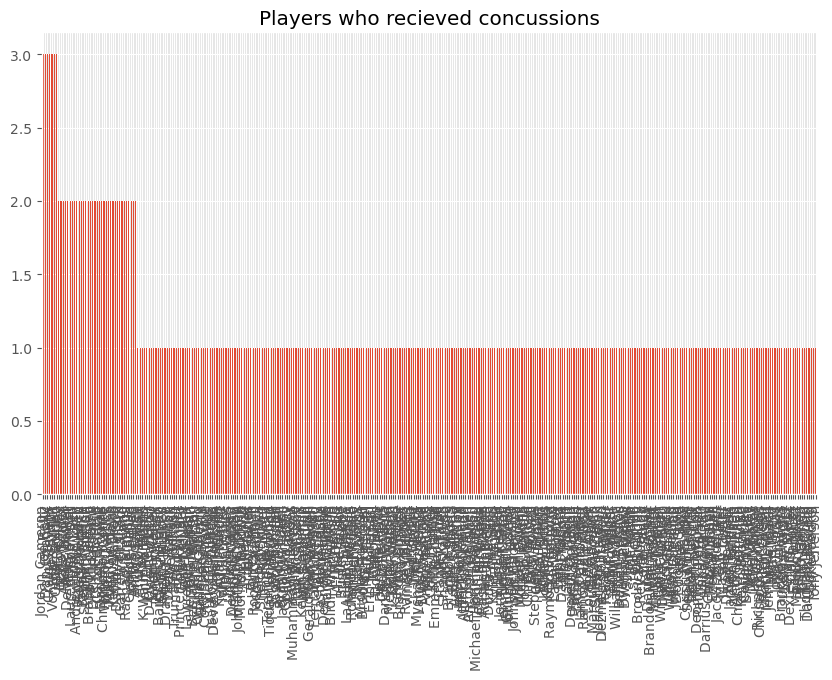

In [21]:
rel_concus_data["Player"].value_counts().plot(kind = 'bar', title = 'Players who recieved concussions')
plt.show()

<AxesSubplot:title={'center':'Teams players recieving concussions'}>

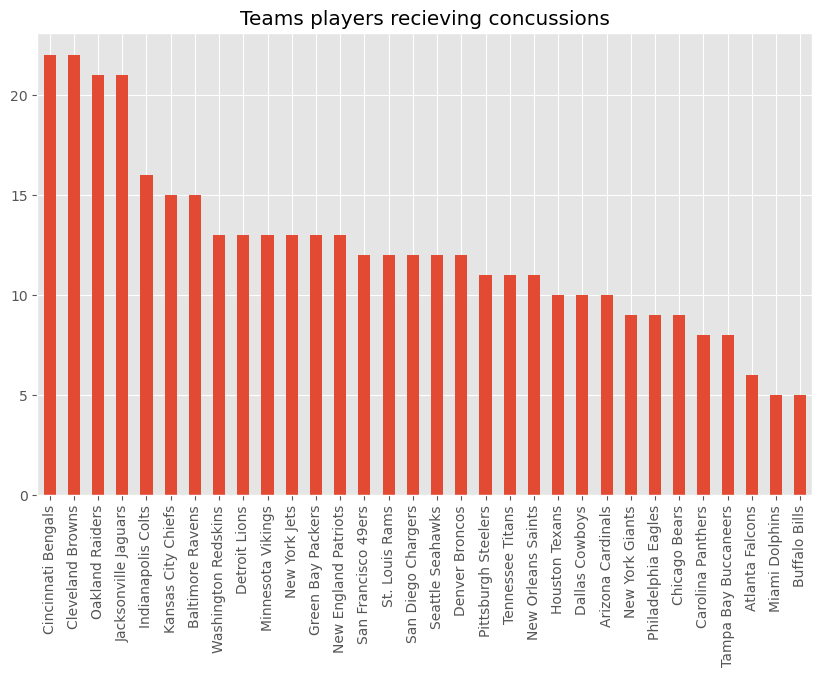

In [22]:
rel_concus_data["Team"].value_counts().plot(kind = 'bar', title = 'Teams players recieving concussions')

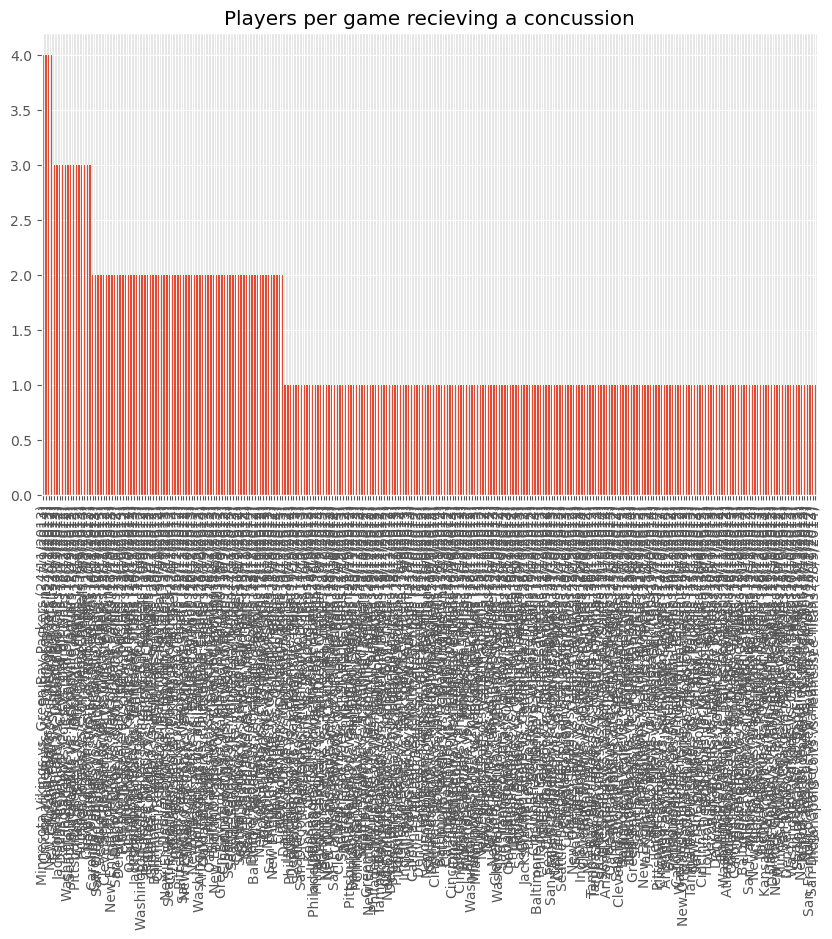

In [23]:
rel_concus_data["Game"].value_counts().plot(kind = 'bar', title = 'Players per game recieving a concussion')
plt.show()

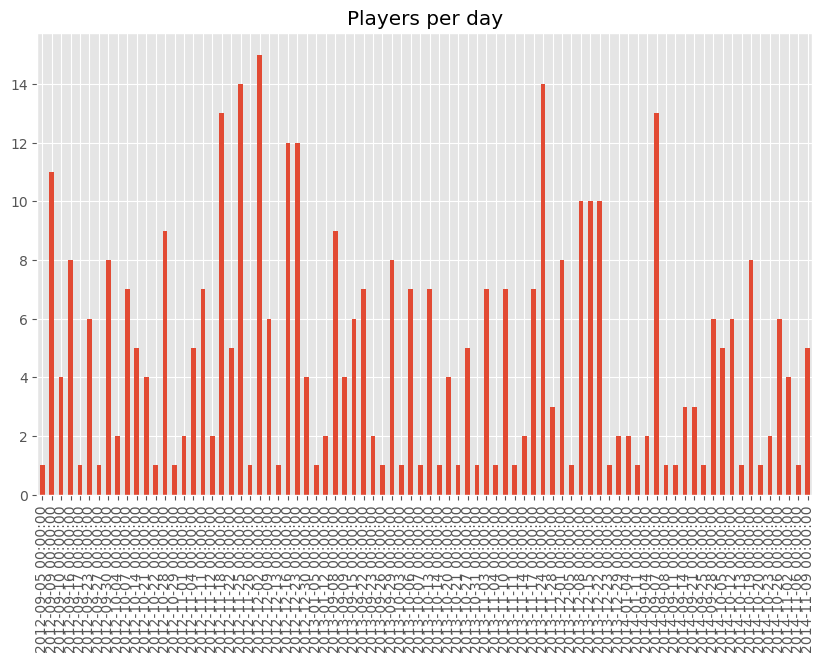

In [24]:
Date_injury = rel_concus_data["Date"].value_counts()
Date_injury.sort_index().plot(kind = 'bar', title = 'Players per day')
plt.show()

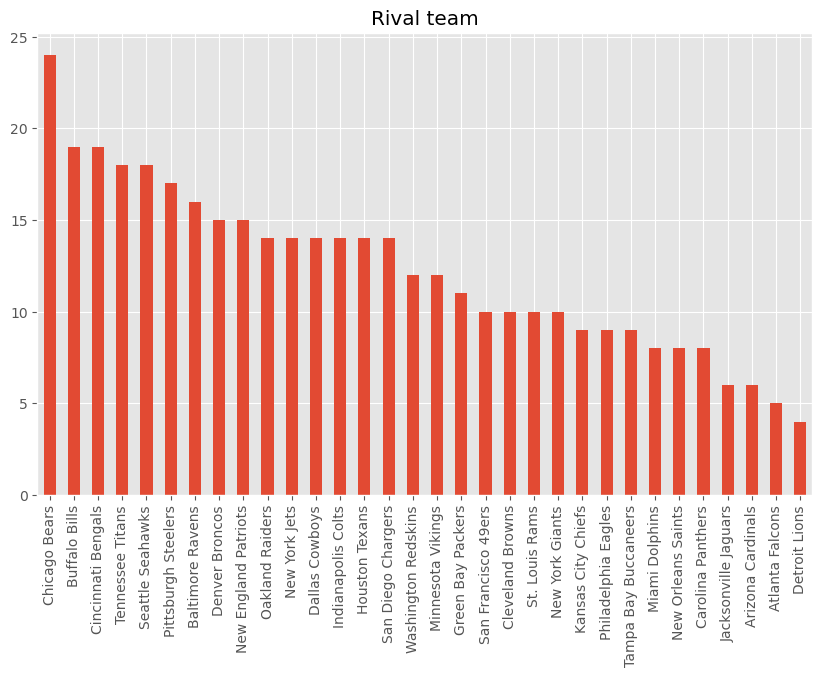

In [25]:
rel_concus_data["Opposing Team"].value_counts().plot(kind = 'bar', title = 'Rival team')
plt.show()

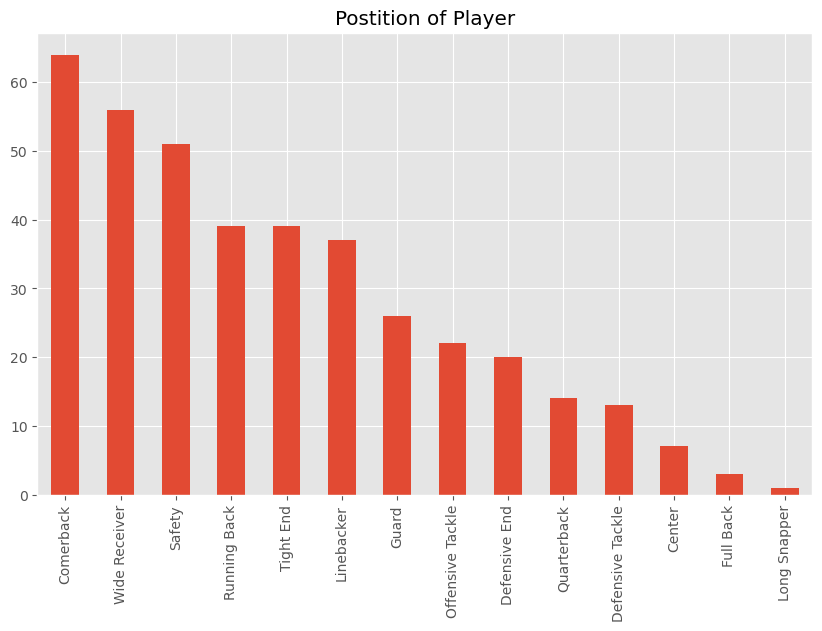

In [26]:
rel_concus_data["Position"].value_counts().plot(kind = 'bar', title = 'Postition of Player')
plt.show()

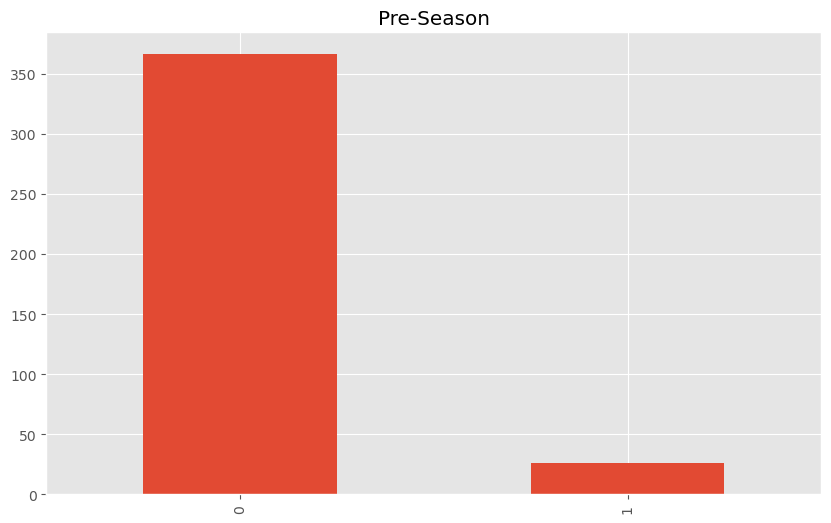

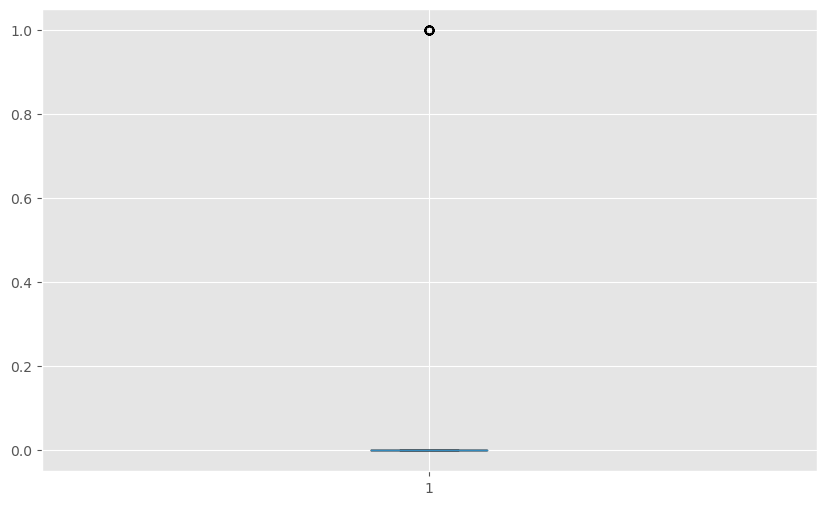

In [27]:
rel_concus_data["Pre-Season Injury?"].value_counts().plot(kind = 'bar', title = 'Pre-Season')
plt.show()
plt.boxplot(rel_concus_data["Pre-Season Injury?"])
plt.show()

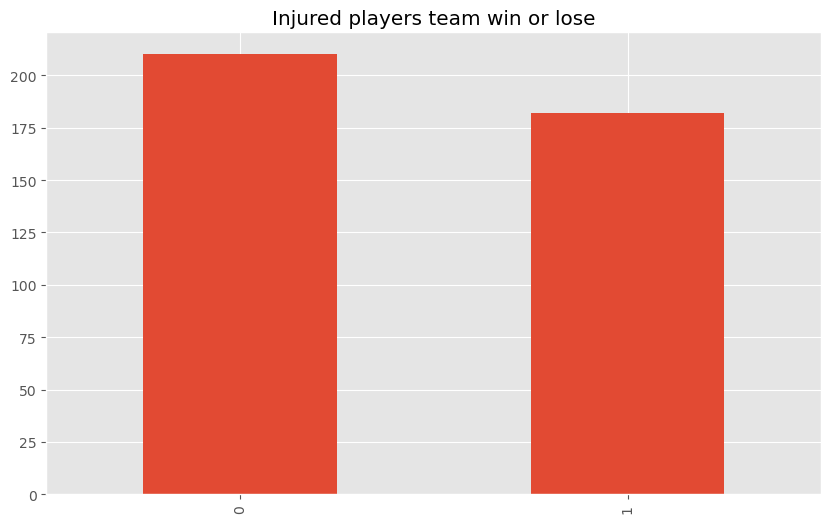

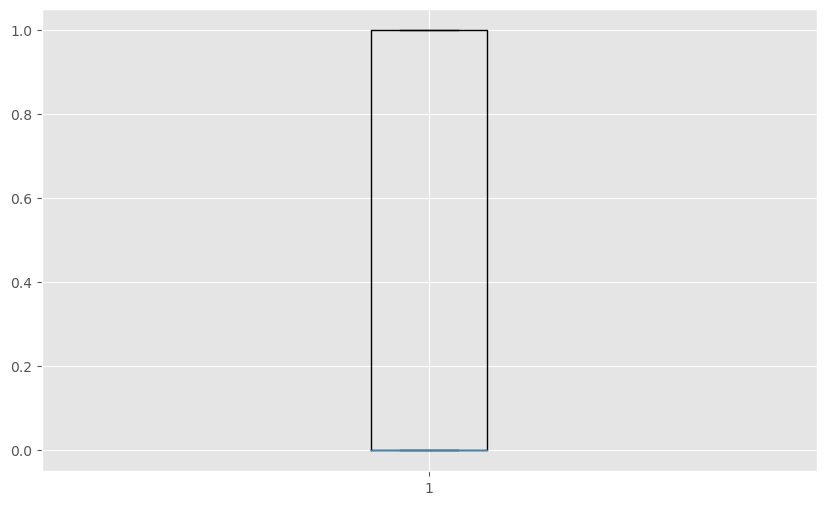

In [28]:
rel_concus_data["Winning Team?"].value_counts().plot(kind = 'bar', title = 'Injured players team win or lose')
plt.show()
plt.boxplot(rel_concus_data["Winning Team?"])
plt.show()

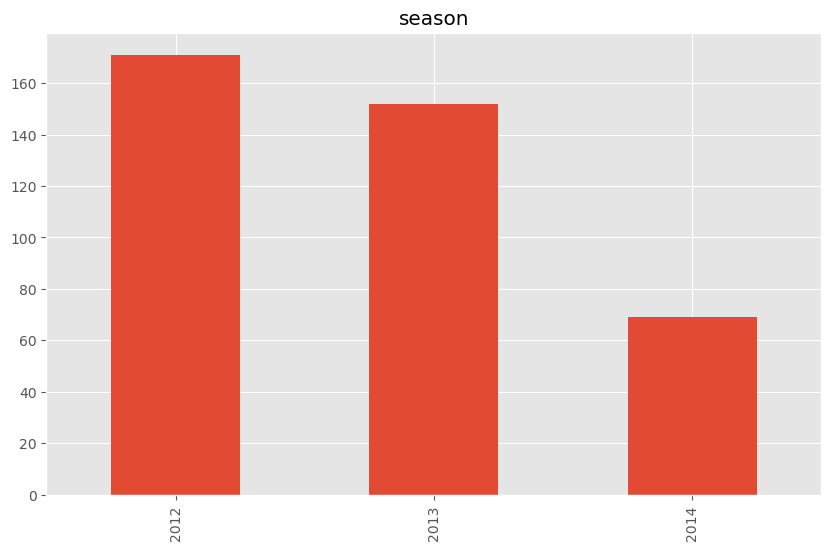

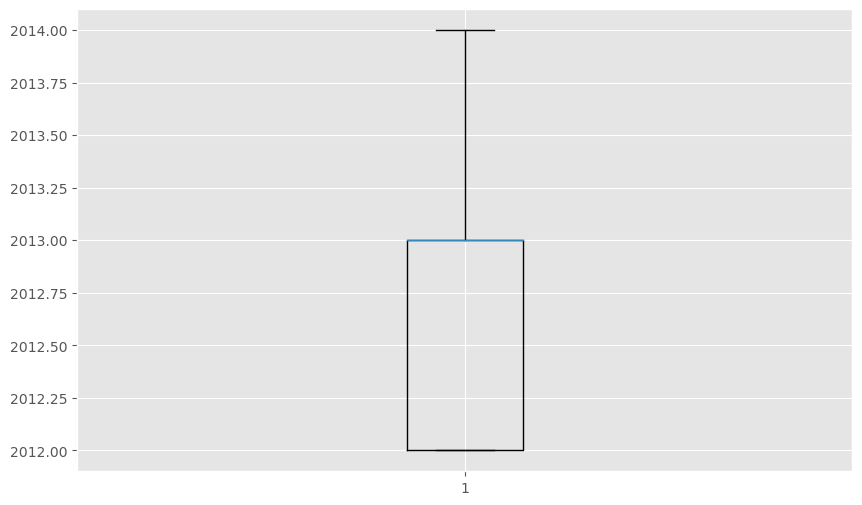

In [29]:
rel_concus_data["Season"].value_counts().plot(kind = 'bar', title = 'season')
plt.show()
plt.boxplot(rel_concus_data["Season"])
plt.show()

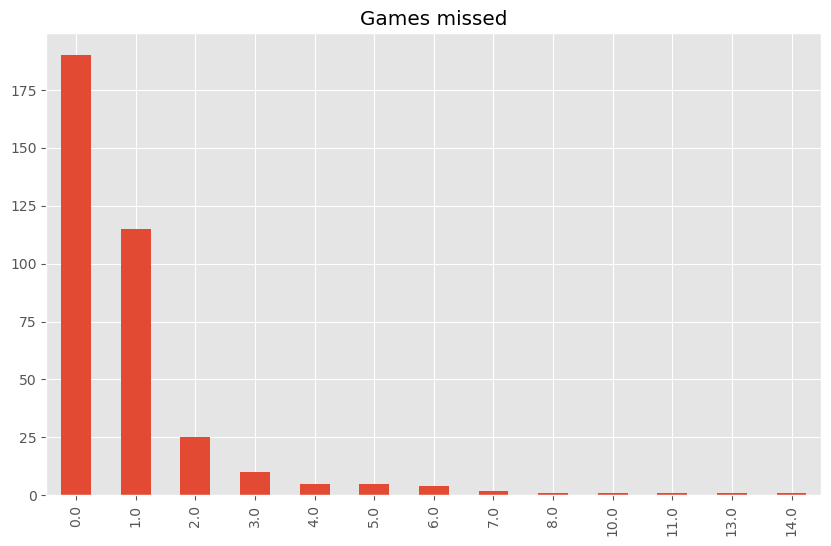

In [30]:
Missed = rel_concus_data["Games Missed"].value_counts()
Missed.sort_index().plot(kind = 'bar', title = 'Games missed')
plt.show()

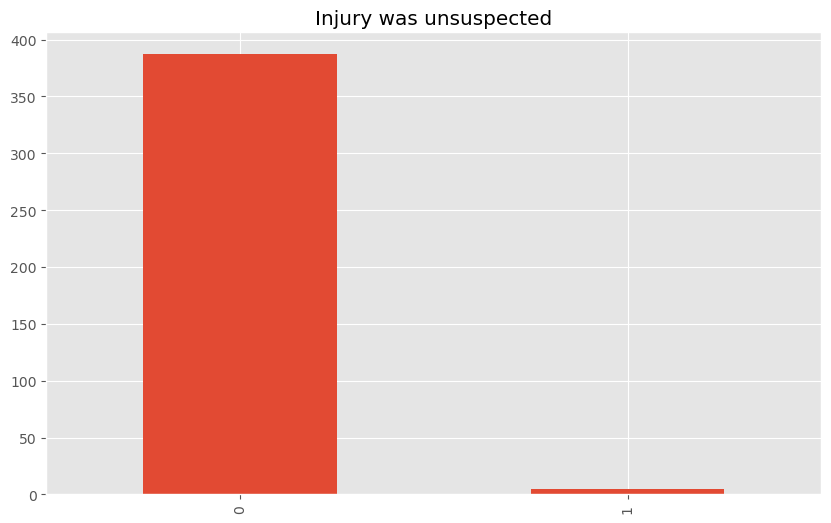

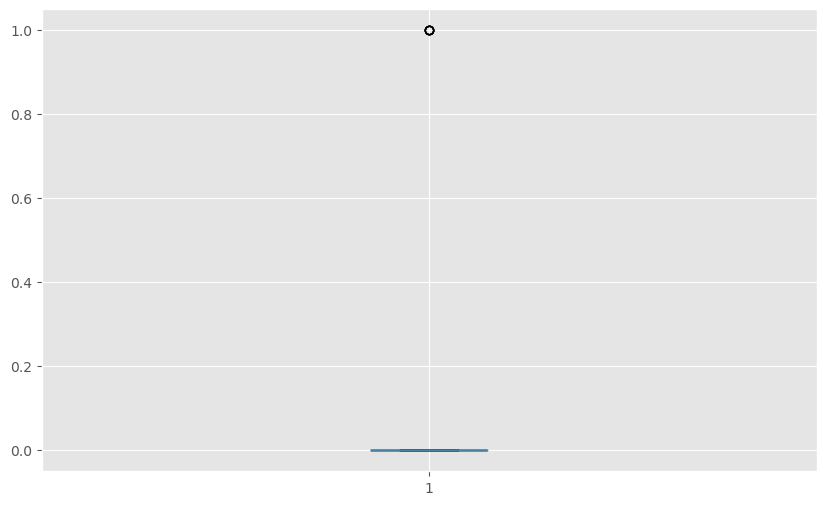

In [31]:
rel_concus_data["Unknown Injury?"].value_counts().plot(kind = 'bar', title = 'Injury was unsuspected')
plt.show()
plt.boxplot(rel_concus_data["Unknown Injury?"])
plt.show()

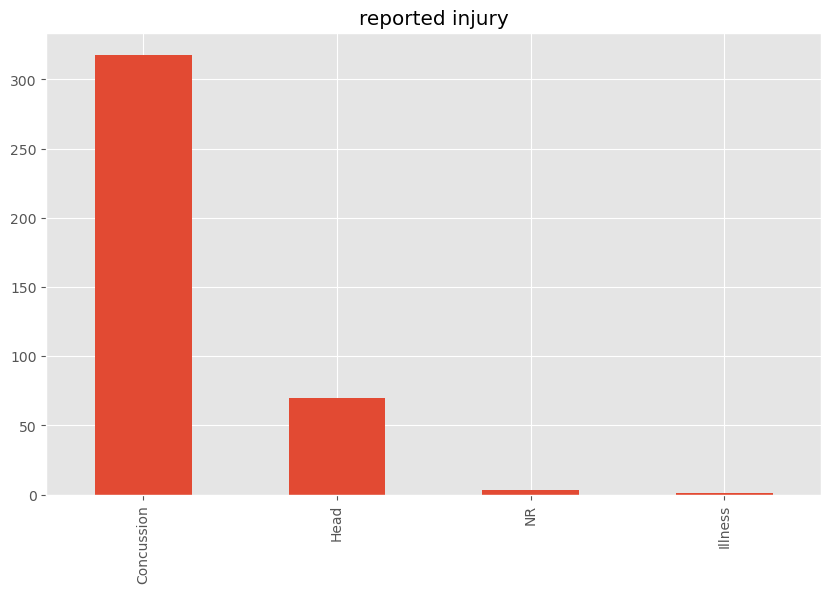

In [32]:
rel_concus_data["Reported Injury Type"].value_counts().plot(kind = 'bar', title = 'reported injury')
plt.show()

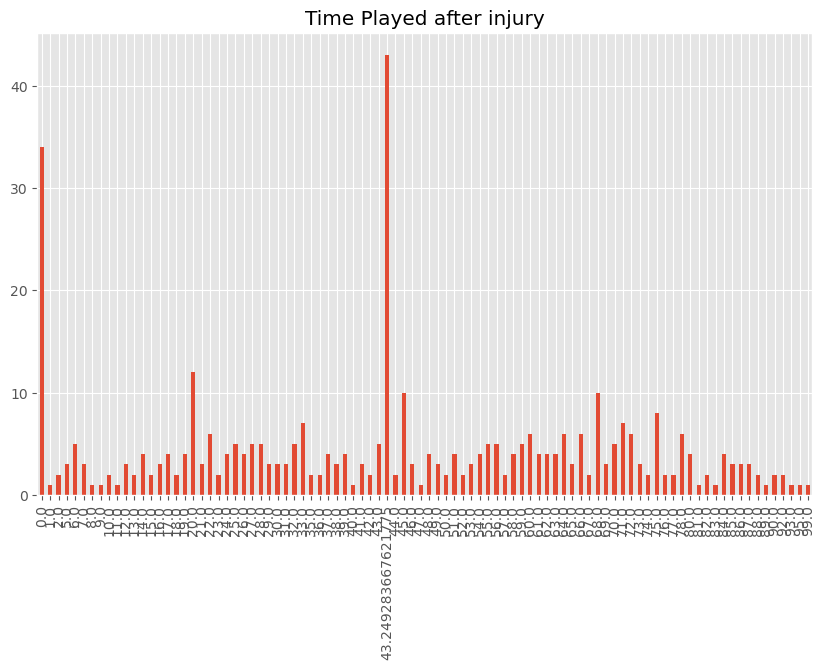

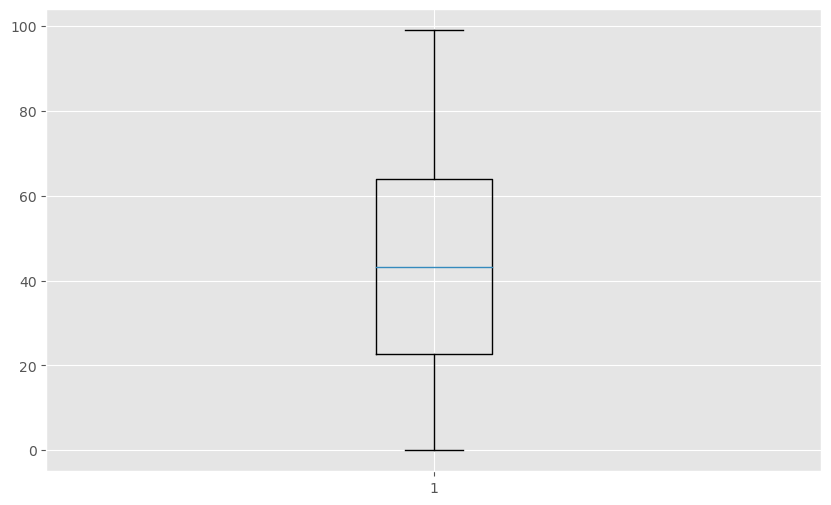

In [33]:
post_inj = rel_concus_data["Play Time After Injury"].value_counts()
post_inj.sort_index().plot(kind = 'bar', title = 'Time Played after injury')
plt.show()
plt.boxplot(rel_concus_data["Play Time After Injury"])
plt.show()

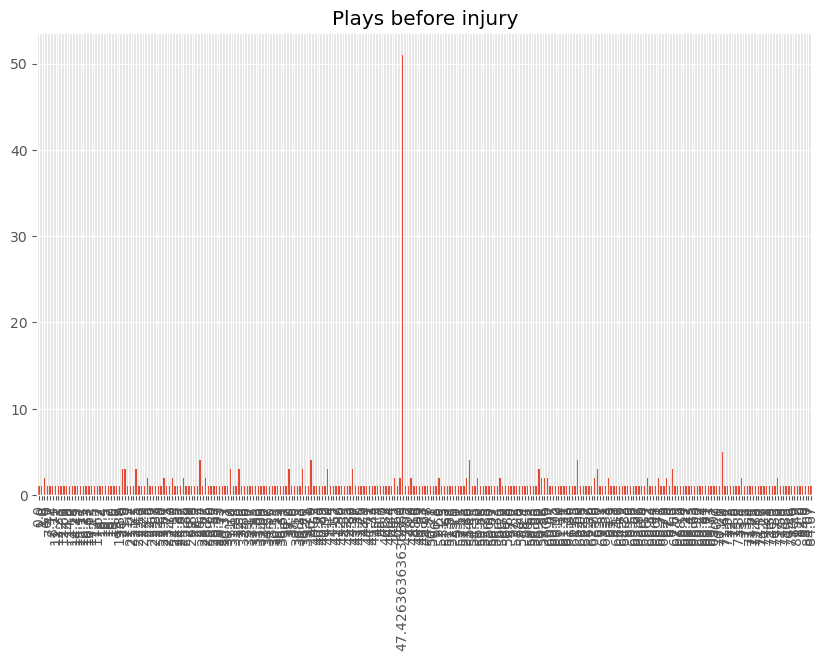

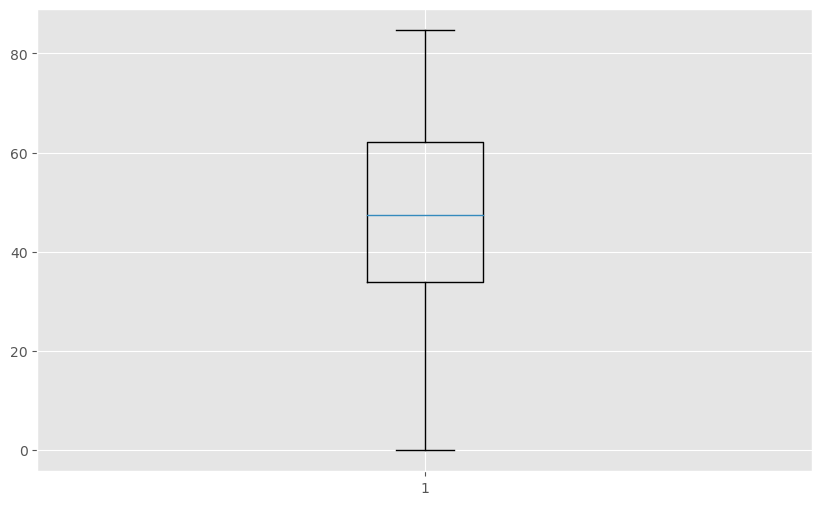

In [34]:
Pre_inj = rel_concus_data["Average Playtime Before Injury"].value_counts()
Pre_inj.sort_index().plot(kind = 'bar', title = 'Plays before injury')
plt.show()
plt.boxplot(rel_concus_data["Average Playtime Before Injury"])
plt.show()